# Credit Simplonien

## Import

In [107]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [108]:
df_train = pd.read_csv('../data/train.txt')
df_test = pd.read_csv('../data/test.txt')

In [109]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [110]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [111]:
df_train = df_train.dropna()

In [112]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


Nous avons charger les deux dataset et il sont uniforme du point de vue de leurs conception, passons à l'exploration

J'ai décider de ne pas rassemblé les dataset pour le preprocessing, commencons par le train dataset

In [113]:
nan_cols = [i for i in df_train.columns if df_train[i].isnull().any()]
print("No. of columns containing null values")
print(len(df_train.columns[df_train.isna().any()]))

print("No. of columns not containing null values")
print(len(df_train.columns[df_train.notna().all()]))

print("Total no. of columns in the dataframe")
print(len(df_train.columns))

No. of columns containing null values
0
No. of columns not containing null values
13
Total no. of columns in the dataframe
13


In [114]:
df_train.duplicated().value_counts()

False    480
dtype: int64

Pas de duplicate

In [115]:
# let's see our data distribution

print(df_train['Loan_Status'].value_counts())
print('-'* 30)
print('Solvable: ', round(df_train['Loan_Status'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Non Solvable: ', round(df_train['Loan_Status'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

Y    332
N    148
Name: Loan_Status, dtype: int64
------------------------------
Solvable:  69.17 % of the dataset
Non Solvable:  30.83 % of the dataset


Les classes sont fortement déséquilibrée, nous devons résoudre ce problème. Voyons voir la distribution !

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

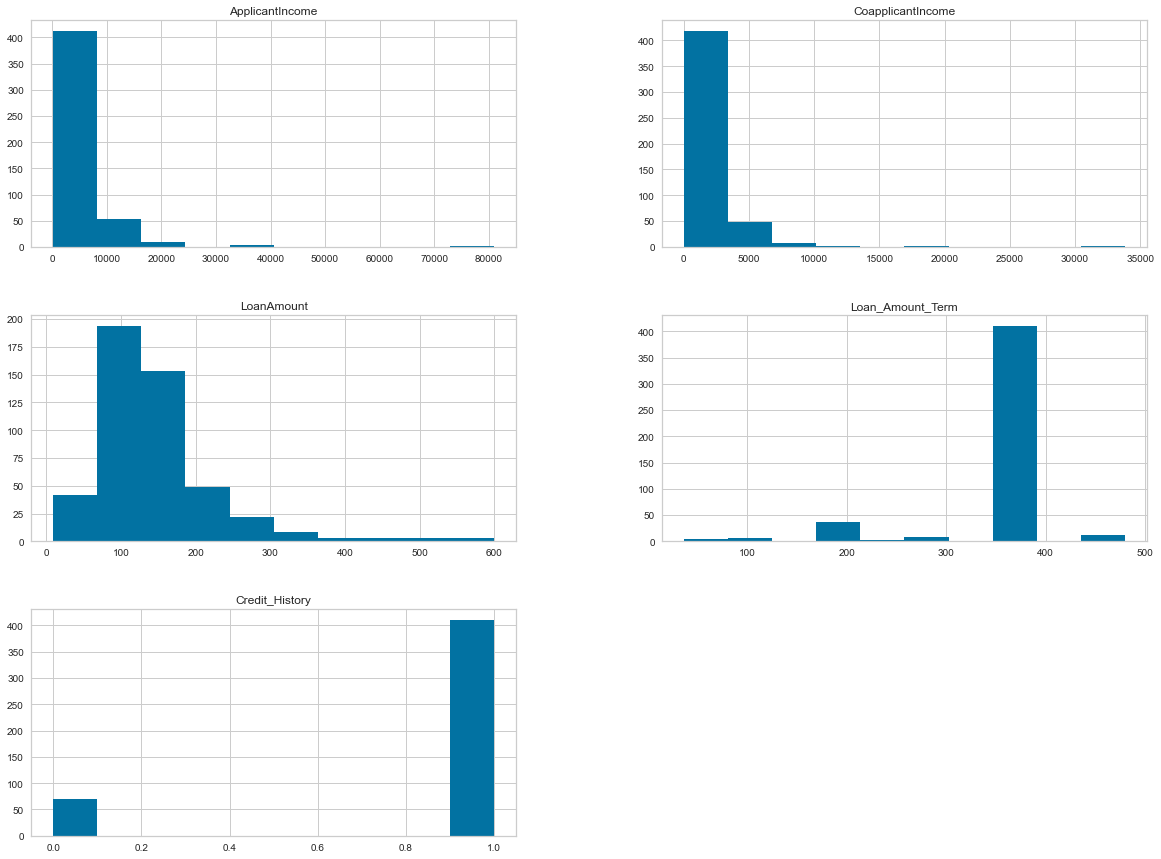

In [116]:
df_train.hist(figsize=(20,15))

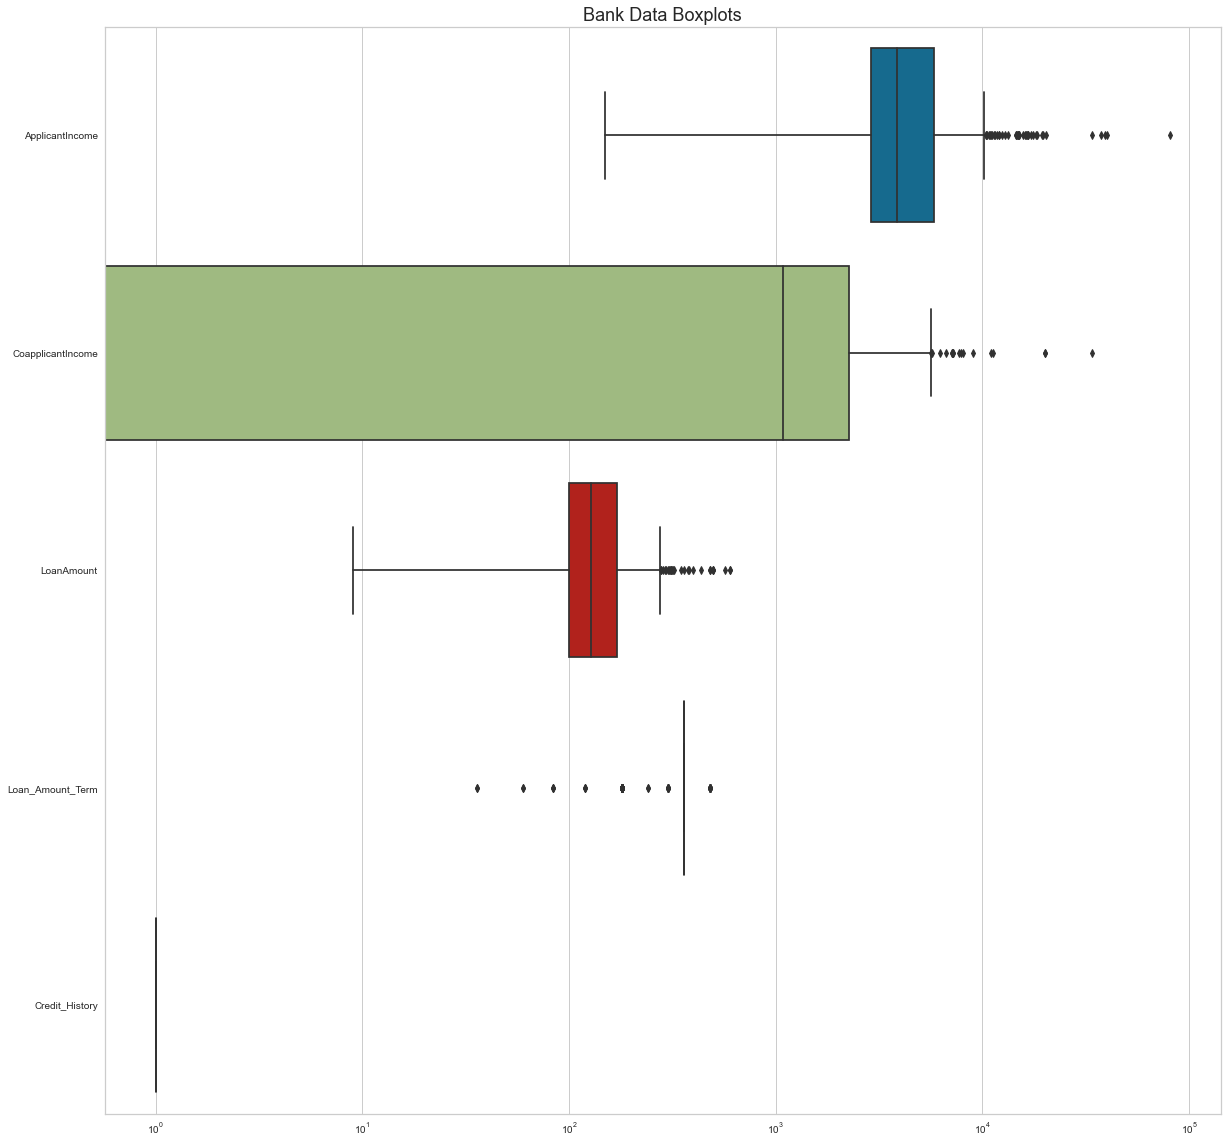

In [117]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df_train, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [118]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.00,267.00,360.00,1.00,Urban,Y


In [119]:
df_train['Education'].value_counts()
df_train['Property_Area'].value_counts()
df_train['Dependents'].value_counts()


0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [120]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df_train['Loan_Status'] = enc.fit_transform(df_train[['Loan_Status']])
df_train['Gender'] = enc.fit_transform(df_train[['Gender']])
df_train['Self_Employed'] = enc.fit_transform(df_train[['Self_Employed']])
df_train['Education'] = enc.fit_transform(df_train[['Education']])
df_train['Dependents'] = enc.fit_transform(df_train[['Dependents']])
df_train['Married'] = enc.fit_transform(df_train[['Married']])
# df_train['Property_Area'] = enc.fit_transform(df_train[['Property_Area']])

df_train['Dependents'].value_counts()


0.00    274
2.00     85
1.00     80
3.00     41
Name: Dependents, dtype: int64

In [121]:
# let's see our data distribution

print(df_train['Loan_Status'].value_counts())
print('-'* 30)
print('Solvable: ', round(df_train['Loan_Status'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Non Solvable: ', round(df_train['Loan_Status'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

1.00    332
0.00    148
Name: Loan_Status, dtype: int64
------------------------------
Solvable:  30.83 % of the dataset
Non Solvable:  69.17 % of the dataset


In [122]:
df_OHEncoded = pd.get_dummies(columns = ['Property_Area'],data = df_train)
# df_train=df_OHEncoded

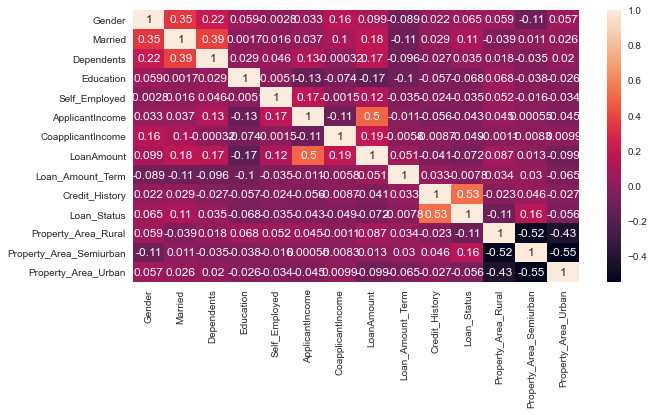

In [123]:
correlation = df_OHEncoded.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True)
plt.show()

In [18]:
df_OHEncoded.to_csv("../data/model_clean.csv", index = False, header=True)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    float64
 2   Married            480 non-null    float64
 3   Dependents         480 non-null    float64
 4   Education          480 non-null    float64
 5   Self_Employed      480 non-null    float64
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 52.5+ KB


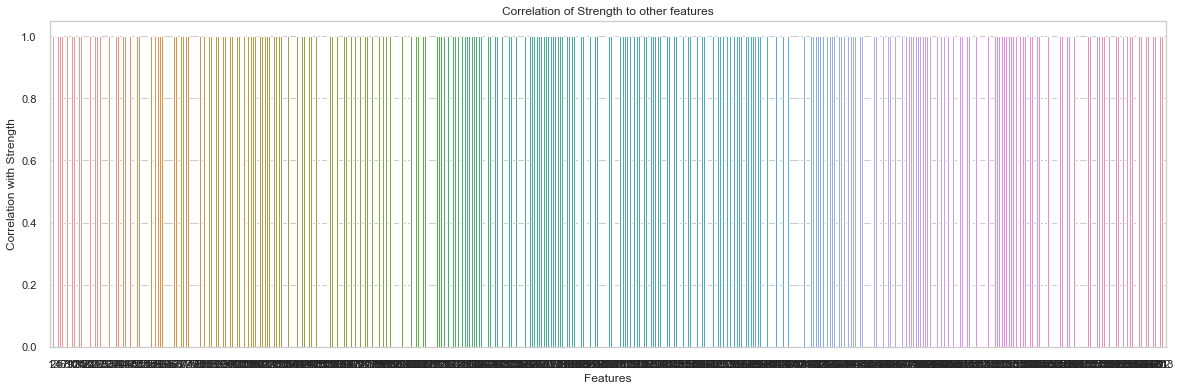

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1.00,1.00,1.00,0.00,0.00,4583,1508.00,128.00,360.00,1.00,0.00,1,0,0
2,LP001005,1.00,1.00,0.00,0.00,1.00,3000,0.00,66.00,360.00,1.00,1.00,0,0,1
3,LP001006,1.00,1.00,0.00,1.00,0.00,2583,2358.00,120.00,360.00,1.00,1.00,0,0,1
4,LP001008,1.00,0.00,0.00,0.00,0.00,6000,0.00,141.00,360.00,1.00,1.00,0,0,1
5,LP001011,1.00,1.00,2.00,0.00,1.00,5417,4196.00,267.00,360.00,1.00,1.00,0,0,1
6,LP001013,1.00,1.00,0.00,1.00,0.00,2333,1516.00,95.00,360.00,1.00,1.00,0,0,1
7,LP001014,1.00,1.00,3.00,0.00,0.00,3036,2504.00,158.00,360.00,0.00,0.00,0,1,0
8,LP001018,1.00,1.00,2.00,0.00,0.00,4006,1526.00,168.00,360.00,1.00,1.00,0,0,1
9,LP001020,1.00,1.00,1.00,0.00,0.00,12841,10968.00,349.00,360.00,1.00,0.00,0,1,0
10,LP001024,1.00,1.00,2.00,0.00,0.00,3200,700.00,70.00,360.00,1.00,1.00,0,0,1


In [126]:
plt.figure(1,figsize =(20,6))
sns.set(style="whitegrid")
sns.barplot(x = df_OHEncoded.index,y = df_OHEncoded['Loan_Status'],data = df_OHEncoded)
plt.title('Correlation of Strength to other features')
plt.ylabel('Correlation with Strength')
plt.xlabel('Features')
plt.show()
df_OHEncoded

In [124]:
from lazypredict.Supervised import LazyClassifier

from sklearn.model_selection import train_test_split


X = df_train.drop(['Loan_Status','Loan_ID'],axis=1)
y= df_train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4, test_size=.2)

clf = LazyClassifier(verbose=0, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:02<00:00, 11.93it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.76               0.73     0.73      0.76   
LGBMClassifier                     0.77               0.71     0.71      0.75   
BaggingClassifier                  0.75               0.71     0.71      0.74   
GaussianNB                         0.76               0.70     0.70      0.74   
NearestCentroid                    0.76               0.69     0.69      0.74   
SGDClassifier                      0.69               0.69     0.69      0.69   
NuSVC                              0.76               0.68     0.68      0.73   
DecisionTreeClassifier             0.70               0.68     0.68      0.70   
SVC                                0.75               0.68     0.68      0.72   
XGBClassifier                      0.73               0.67     0.67      0.71   
RandomForestClassifier      

In [21]:
print(X.shape)
print(y.shape)

(480, 13)
(480,)


In [22]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier



# define pipeline
model = GradientBoostingClassifier()
# counter = Counter(y)
# print(counter)

# transform the dataset
oversample = BorderlineSMOTE()


# summarize the new class distribution
# counter = Counter(y)
# print(counter)
steps = [('over', oversample), ('model', model)]
pipeline = Pipeline(steps=steps)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('accuracy: %.3f' % mean(scores))

accuracy: 0.755


In [23]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report
import numpy as np



X = df_OHEncoded.drop(['Loan_Status','Loan_ID'],axis = 1)
y = df_OHEncoded['Loan_Status']


# define pipeline
model = DecisionTreeClassifier()
# counter = Counter(y)
# print(counter)

# transform the dataset
oversample = BorderlineSMOTE()
#X, y = oversample.fit_resample(X, y)


# summarize the new class distribution

second_steps = [('over', oversample), ('model', model)]
second_pipeline = Pipeline(steps=second_steps)

# split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Train pipeline
knn_pipe_trained = second_pipeline.fit(X_train,y_train)

# Make predictions
knn_pipe_trained.predict(X_test)

# Score model
knn_pipe_trained.score(X_test,y_test)
y_pred = np.around(knn_pipe_trained.predict(X_test))
# target_names = ['0,1']
# counter = Counter(y)
# print(counter)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.53      0.51        49
         1.0       0.75      0.73      0.74        95

    accuracy                           0.66       144
   macro avg       0.62      0.63      0.63       144
weighted avg       0.66      0.66      0.66       144



Here is our first iteration and BASLINE with reacall of 0.76 for our class 1, let's try another models

In [24]:


# define pipeline
model = DecisionTreeClassifier()
# counter = Counter(y)
# print(counter)

# transform the dataset
oversample = BorderlineSMOTE()
#X, y = oversample.fit_resample(X, y)


# summarize the new class distribution

second_steps = [('over', oversample), ('model', model)]
second_pipeline = Pipeline(steps=second_steps)


# Train pipeline
knn_pipe_trained = second_pipeline.fit(X_train,y_train)

# Make predictions
knn_pipe_trained.predict(X_test)

# Score model
knn_pipe_trained.score(X_test,y_test)
y_pred = np.around(knn_pipe_trained.predict(X_test))
# target_names = ['0,1']
# counter = Counter(y)
# print(counter)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.55      0.54        49
         1.0       0.76      0.75      0.76        95

    accuracy                           0.68       144
   macro avg       0.65      0.65      0.65       144
weighted avg       0.68      0.68      0.68       144



### BorderlineSMOTE and Logistic Regression

In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SVMSMOTE
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.linear_model import LogisticRegression




sel = BorderlineSMOTE()
clf =  LogisticRegression(C=0.001,class_weight='balanced',penalty='l2',solver='sag')

model3 = imbpipeline(steps=[('sel', sel),('clf', clf)])

model3.fit(X_train, y_train)
model3.predict(X_test)

# How well do your hyperparameter optimizations generalize
model3.score(X_test, y_test)

y_pred = np.around(model3.predict(X_test))
# target_names = ['0,1']
# counter = Counter(y)
# print(counter)

print(classification_report(y_test, y_pred))


# # Train pipeline
# knn_pipe_trained = second_pipeline.fit(X_train,y_train)

# # Make predictions
# knn_pipe_trained.predict(X_test)

# # Score model
# knn_pipe_trained.score(X_test,y_test)
# y_pred = np.around(knn_pipe_trained.predict(X_test))
# # target_names = ['0,1']
# counter = Counter(y)
# print(counter)

# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.27      0.39      0.32        49
         1.0       0.59      0.46      0.52        95

    accuracy                           0.44       144
   macro avg       0.43      0.43      0.42       144
weighted avg       0.48      0.44      0.45       144



In [105]:
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler



k_values = [4]
for k in k_values:
	# define pipeline
	model11 = GradientBoostingClassifier(learning_rate = 0.1, max_depth= 3, n_estimators= 50, subsample= 1.0)
	over = SMOTE(sampling_strategy=1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=1)
	steps = [('over', over), ('under', under), ('model', model)]
	model11 = imbpipeline(steps=steps)
	model11.fit(X_train, y_train)
	model11.predict(X_test)
	model11.score(X_test, y_test)
	y_pred = np.around(model11.predict(X_test))
	print(classification_report(y_test, y_pred))

	

              precision    recall  f1-score   support

         0.0       0.75      0.43      0.55        35
         1.0       0.74      0.92      0.82        61

    accuracy                           0.74        96
   macro avg       0.74      0.67      0.68        96
weighted avg       0.74      0.74      0.72        96



In [70]:
import pickle
pickle.dump(model11, open('../data/pipe_model_SGB.pkl', 'wb'))


[0.         0.57142857 1.        ] [0.         0.94736842 1.        ]
68.796992481203


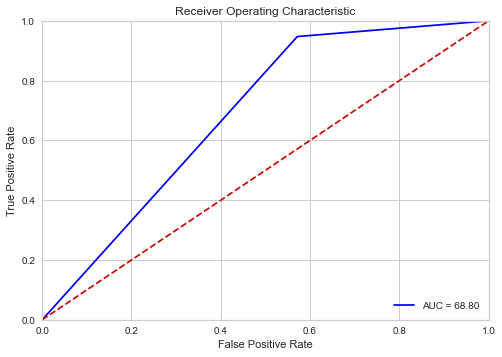

In [48]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_test,y_pred,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

#tracer tp en fonction de fp
import matplotlib.pyplot as plt
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
# define the model with default hyperparameters
model = GradientBoostingClassifier()
from sklearn.model_selection import GridSearchCV
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',verbose=3)
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 180 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 452 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1664 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2140 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 3480 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 4088 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 4880 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 28.1min finished


Best: 0.807639 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.691667 (0.008333) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.691667 (0.008333) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.691667 (0.008333) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.691667 (0.008333) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.691667 (0.008333) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.691667 (0.008333) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
0.691667 (0.008333) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.691667 (0.008333) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.691667 (0.008333) with: {'learning_rate': 0.0001, 

In [28]:
from imblearn.over_sampling import ADASYN

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler




model = GradientBoostingClassifier()
over = ADASYN()
under = RandomUnderSampler(sampling_strategy=1)
steps = [('over', over), ('under', under), ('model', model)]
model11 = imbpipeline(steps=steps)
model11.fit(X_train, y_train)
model11.predict(X_test)
model11.score(X_test, y_test)
y_pred = np.around(model11.predict(X_test))
print(classification_report(y_test, y_pred))

	

              precision    recall  f1-score   support

         0.0       0.78      0.43      0.55        49
         1.0       0.76      0.94      0.84        95

    accuracy                           0.76       144
   macro avg       0.77      0.68      0.70       144
weighted avg       0.77      0.76      0.74       144



In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SVMSMOTE
from sklearn.ensemble import AdaBoostClassifier

X = df_OHEncoded.drop(['Loan_Status','Loan_ID'],axis=1)
y= df_OHEncoded['Loan_Status']
# split
X_tr, X_tst, y_tr, y_tst = train_test_split(X,y, test_size=0.3, random_state=0)


k_values = [1, 2, 3, 4, 5, 6, 7]

	# define pipeline
model = GradientBoostingClassifier()
over = SVMSMOTE()
# under = RandomUnderSampler(sampling_strategy=0.1)
steps = [('over', over), ('model', model)]
model8 = imbpipeline(steps=steps)
model8.fit(X_tr, y_tr)
model8.predict(X_tst)
model8.score(X_tst, y_tst)
y_pred = np.around(model8.predict(X_test))
print(classification_report(y_test, y_pred))

	

              precision    recall  f1-score   support

         0.0       0.74      0.47      0.58        49
         1.0       0.77      0.92      0.84        95

    accuracy                           0.76       144
   macro avg       0.76      0.69      0.71       144
weighted avg       0.76      0.76      0.75       144



### Model selectionné

In [ ]:
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler



k_values = [4]
for k in k_values:
	# define pipeline
	model11 = GradientBoostingClassifier(learning_rate = 0.1, max_depth= 3, n_estimators= 50, subsample= 1.0)
	over = SMOTE(sampling_strategy=1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=1)
	steps = [('over', over), ('under', under), ('model', model)]
	model11 = imbpipeline(steps=steps)
	model11.fit(X_train, y_train)
	model11.predict(X_test)
	model11.score(X_test, y_test)
	y_pred = np.around(model11.predict(X_test))
	print(classification_report(y_test, y_pred))

	

              precision    recall  f1-score   support

         0.0       0.75      0.43      0.55        35
         1.0       0.74      0.92      0.82        61

    accuracy                           0.74        96
   macro avg       0.74      0.67      0.68        96
weighted avg       0.74      0.74      0.72        96



[0.         0.57142857 1.        ] [0.         0.94736842 1.        ]
68.796992481203


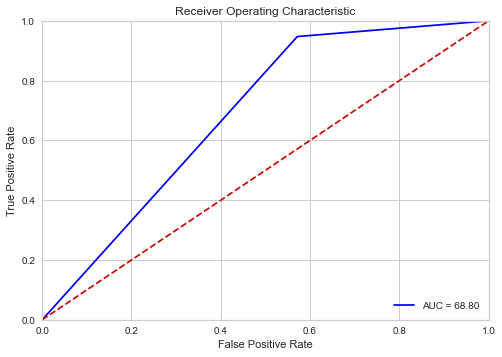

In [ ]:
from sklearn.metrics import roc_curve,auc
fp, tp, thresholds=roc_curve(y_test,y_pred,pos_label=1)
print(fp, tp)
AUC=auc(fp, tp)*100
print(AUC)

#tracer tp en fonction de fp
import matplotlib.pyplot as plt
plt.plot(fp, tp, color='blue',label = 'AUC = %0.2f' % AUC)
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import pickle
pickle.dump(model11, open('../data/pipe_model_SGB.pkl', 'wb'))
